In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import opart_k_segments
import opart_lda

In [2]:
def get_mean(sequence, chpnt):
    mean = np.zeros(len(sequence))
    chpnt = np.append(chpnt, len(sequence)-1)
    chpnt = np.append(-1, chpnt)
    chpnt = chpnt + 1
    for i in range(len(chpnt)-1):
        mean[chpnt[i]:chpnt[i+1]] = np.mean(sequence[chpnt[i]:chpnt[i+1]])
    return mean

In [3]:
def get_loss(sequence, mean):
    return np.sum(np.square(sequence - mean))

In [4]:
def get_number_of_segment(chpnt):
    return len(chpnt) + 1

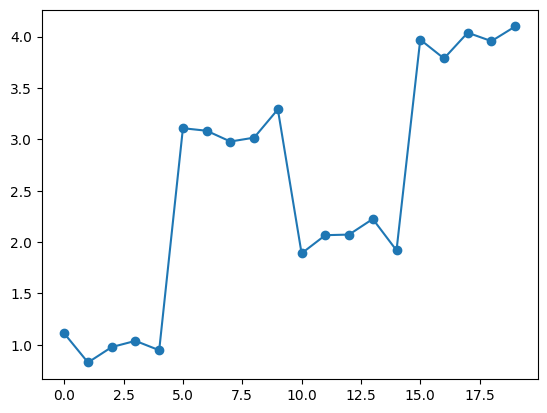

In [5]:
# template vector
values = [1, 3, 2, 4]
segment_length = 20 // 4
noise_strength = 0.1

sequence = np.concatenate([
    np.full(segment_length, value) + np.random.normal(0, noise_strength, segment_length) 
    for value in values
])

plt.plot(sequence, marker='o')

In [6]:
losses = np.array([])
for k in range(len(sequence)):
    chpnt = opart_k_segments.opart(sequence, k + 1)
    mean  = get_mean(sequence, chpnt)
    loss  = get_loss(sequence, mean)
    losses = np.append(losses, loss)

In [7]:
lda_list = losses[:-1] - losses[1:]
lda_list = np.sort(lda_list)[::-1]

In [15]:
for i in range(len(lda_list)):
    lda = lda_list[i]
    small_n_seg = get_number_of_segment(opart_lda.opart(sequence, lda + 1e-7))
    big_n_seg = get_number_of_segment(opart_lda.opart(sequence, lda - 1e-7))
    if(big_n_seg > small_n_seg):
        print(small_n_seg, str(lda) + "+")
        print(big_n_seg, str(lda) + "-")
        print(30*'-')

1 15.802579660107183+
2 15.802579660107183-
------------------------------
2 6.576388687295472+
3 6.576388687295472-
------------------------------
3 2.8134487525511225+
4 2.8134487525511225-
------------------------------
4 0.047925311792353265+
5 0.047925311792353265-
------------------------------
7 0.02773133985993048+
8 0.02773133985993048-
------------------------------
7 0.027731339859930426+
8 0.027731339859930426-
------------------------------
8 0.021139545844755442+
9 0.021139545844755442-
------------------------------
9 0.0191709391637553+
10 0.0191709391637553-
------------------------------
10 0.016815523076079225+
11 0.016815523076079225-
------------------------------
11 0.015988147554265326+
12 0.015988147554265326-
------------------------------
12 0.009673253639282425+
13 0.009673253639282425-
------------------------------
13 0.006870209720262756+
14 0.006870209720262756-
------------------------------
14 0.003378680379688365+
15 0.003378680379688365-
-------------